In Centipede a player has a 40% chance of successfully shooting a centipede segment with any single shot. Assuming each shot is independent of the other shots and the player takes 10 shots at centipede segments, what is the probability that the player successfully hits 6 segments?

I am assuming that each shot is independednt from one another and the player takes 10 shots

A success will be if the player hits a centipede segment with one shot, while a failure will be if a player misses a centipede segment with one shot. 

One trial of the simulation will be a single shot fired, meaning each trial will either have an outcome of 0 (miss) or 1 (hit)

The discrete random variable I am examining is whether or not the player hits the centipede segment. 

In [2]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-rom-license]

   ---------------------------------------- 0.0/951.1 kB ? eta -:--:--
   ---------------------------------------- 951.1/951.1 kB 9.0 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -----

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom
import gymnasium as gym
import ale_py
from tqdm import trange
from IPython.display import clear_output, display
import time

p_hit = 0.4         
n_shots = 10         
n_trials = 1000  

np.random.seed(42)  

hits = np.random.binomial(n=n_shots, p=p_hit, size=n_trials)

prob_6_hits = binom.pmf(6, n_shots, p_hit)
print(f"Probability of hitting exactly 6 segments: {prob_6_hits:.4f}")

Probability of hitting exactly 6 segments: 0.1115


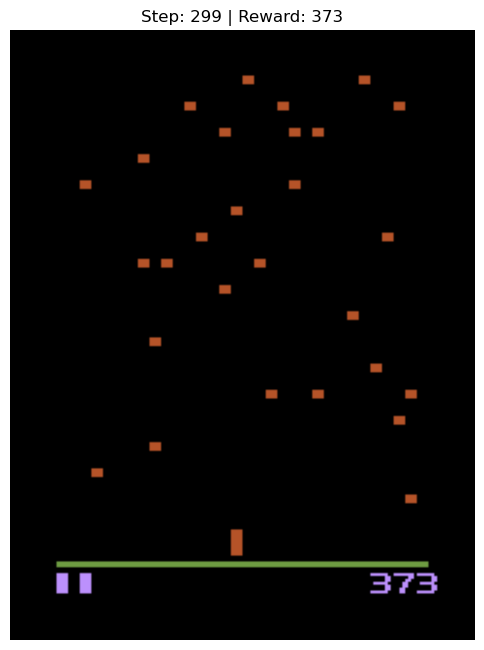

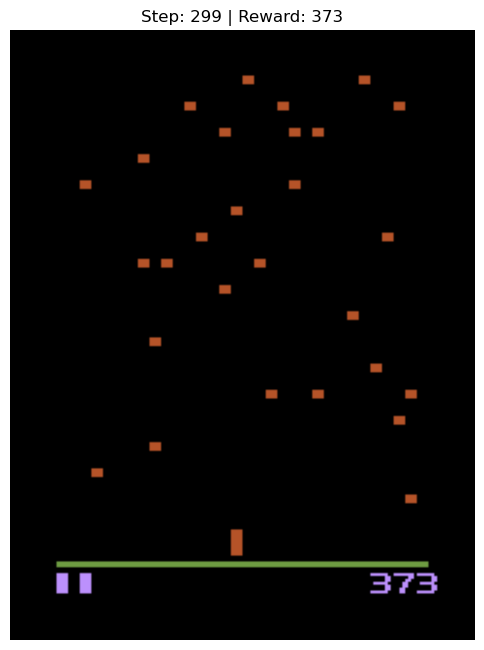

In [2]:
env = gym.make('Centipede-v0', render_mode='rgb_array')
observation, info = env.reset()

fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')
total_reward = 0

for step in range(300):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    clear_output(wait=True)
    ax.clear()
    ax.imshow(env.render())
    ax.set_title(f"Step: {step} | Reward: {total_reward:.0f}")
    ax.axis('off')
    display(fig)
    time.sleep(0.03)  

    if terminated or truncated:
        observation, info = env.reset()
        total_reward = 0

env.close()



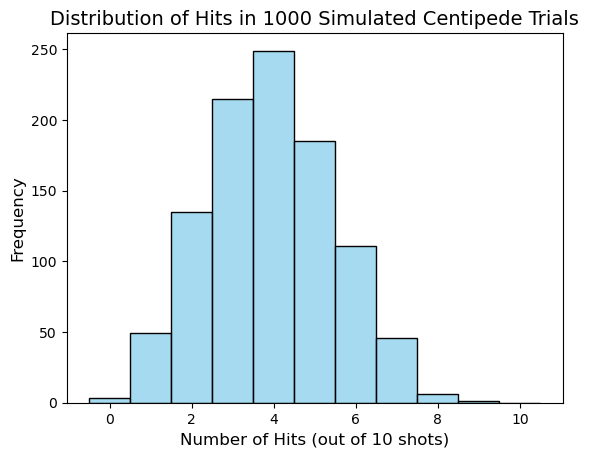

In [3]:
sns.histplot(hits, bins=np.arange(-0.5, n_shots + 1.5, 1), kde=False, color='skyblue')
plt.title("Distribution of Hits in 1000 Simulated Centipede Trials", fontsize=14)
plt.xlabel("Number of Hits (out of 10 shots)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

The Theoretical probability I calculated using the Binomial Distribution formula is 0.111477 or 0.1115. In other words, the Theoretical probability is  a 11.15 percent chance of a player successfully hiting 6 out of 10 shots at a centipede segment. The empirical probability was also 0.1115 or an 11.15 percent chance of successfully hitting 6 out of 10 shots at a centipede segment. This suggests that in an actual game of centipede a player has around an 11.15 percent chance of hitting exatcly 6 out of 10 centipede segments. 